In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.utils import np_utils

# Veri dosya üzerinden okunur.
import io
from google.colab import files

Using TensorFlow backend.


In [0]:
uploaded = files.upload()
pd.read_csv(io.StringIO(uploaded["iris.data"].decode("utf-8")))
data = pd.read_csv('iris.data')
# PART 1 - DATAPREPROCESSING
print(data)
# Okunan veri girdi(X) ve çıktı(Y) olarak ayrıştırılır.
X = data.iloc[:,:4].values
Y = data.iloc[:,4].values  

Saving iris.data to iris.data
     5.1  3.5  1.4  0.2     Iris-setosa
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2     Iris-setosa
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4     Iris-setosa
..   ...  ...  ...  ...             ...
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 5 columns]


In [0]:
print("Satir : ", data.iloc[:,:].values[0])
print("Girdi : ", X[0])
print("Çıktı : ", Y[0])

Satir :  [4.9 3.0 1.4 0.2 'Iris-setosa']
Girdi :  [4.9 3.  1.4 0.2]
Çıktı :  Iris-setosa


In [0]:
# Okunan verinin çıktı kısmı birden fazla sınıf içerdiğinden kategorik olarak ayrıştırılır.
# Toplamda 3 sınıf var: Iris-setosa,Iris-versicolor,Iris-virginica
# Bu sınıflar kategorik veri olarak adlandırıldığından programın işleyeceği sayısal verilere dönüştürülür
# Örnek Iris Setosa:      1 0 0
#       Iris Versicolor:  0 1 0
#       Iris virginica:   0 0 1
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y) 
Y = np_utils.to_categorical(Y)    

In [0]:
# Verinin %80'i train, %20'si test verisi olacak şekilde ayrılır. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Z-Score normalizasyon işlemi yapılır.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
print(X_train)

[[-0.84458245  0.76054343 -1.39462947 -1.37310134]
 [-0.96820522 -1.29638085 -0.48118795 -0.19285131]
 [ 0.39164525 -0.38219228  0.26098329  0.06942647]
 [ 0.02077694  0.30344915  0.54643377  0.72512093]
 [-0.96820522  1.674732   -1.33753937 -1.24196244]
 [-1.21545076 -1.29638085  0.37516348  0.59398204]
 [ 0.63889079  0.074902    0.94606443  0.72512093]
 [ 0.14439971 -1.98202227  0.08971301 -0.3239902 ]
 [ 1.25700463  0.074902    0.60352386  0.33170426]
 [-1.58631907  0.074902   -1.33753937 -1.37310134]
 [ 0.76251356 -0.15364514  0.77479415  0.98739871]
 [-1.33907353  0.76054343 -1.28044928 -1.37310134]
 [-1.21545076 -1.52492799 -0.30991766 -0.3239902 ]
 [-0.10284583 -0.61073942  0.71770405  1.51195428]
 [ 1.00975909  0.53199629  1.06024462  1.64309317]
 [ 2.24598679  1.674732    1.63114558  1.2496765 ]
 [-0.10284583 -0.83928656  0.1468031  -0.3239902 ]
 [-0.2264686  -1.06783371 -0.19573747 -0.3239902 ]
 [ 0.51526802 -1.29638085  0.60352386  0.33170426]
 [ 0.63889079 -0.61073942  1.00

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# PART 2 - CREATE ANN (http://keras.io - Farklı parametreleri kullanmak isteyenler için)
# Yapay sinir ağını oluşturmak için sıralı bir model kullanacağım belirtilir.

# Sıralı Model: Input Layer - Hidden Layer - Output Layer gibi..
model = Sequential()
# Input Layer ve İlk Hidden Layer katmanı eklenir.
# Units: O katman için kullanılacak olan düğüm sayısı
# Activation: Değerlerin belirli bir aralığa getirilmesi için kullanılacak fonksiyon
# Kernel_Initiliazer: Başlangıçta ağırlıkların hangi metod ile belirleneceği
# Input_shape veya Input_dim: Input layerdaki girdi sayısı. Verinizde her bir satırdaki özellik sayısı 
model.add(Dense(units = 32, activation = 'sigmoid', kernel_initializer = 'uniform', input_shape = (4,)))
# İkinci Hidden Layer katmanı eklenir. (İsteğe bağlı)
model.add(Dense(units = 32, activation = 'relu', kernel_initializer = 'uniform'))

# Output Layer katmanı eklenir.
model.add(Dense(units = 3, activation = 'sigmoid', kernel_initializer = 'uniform'))
# Loss = Beklenen değer ile hesaplanan değer arasındaki farkı hesaplayarak ne kadar kayıp olduğunu hesaplar
# Optimizer = Hatanın optimize edilmesini sağlar. Aslında yapay sinir ağının öğrenme işlemini gerçekleştirir.
# model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.compile(Adam(lr = 0.05), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                160       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 99        
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
 # Oluşturulan model train verileri ile eğitilir. Yapay Sinir Ağı eğitilmeye başlar.
# nb_epoch: İterasyon sayısı
history_callback_train = []
history_callback_test = []
unit_size = [4, 6, 12, 24, 32]
for i in range(5):
  model = Sequential()
  model.add(Dense(units = unit_size[i], activation = 'sigmoid', kernel_initializer = 'uniform', input_shape = (4,)))
  model.add(Dense(units = unit_size[i], activation = 'sigmoid', kernel_initializer = 'uniform', input_shape = (4,)))
  model.add(Dense(units = 3, activation = 'sigmoid', kernel_initializer = 'uniform'))
  model.compile(Adam(lr = 0.05), loss='categorical_crossentropy', metrics=['accuracy'])
  history_callback_train.append(model.fit(X_train,y_train,nb_epoch=100))
  loss,accuracy = model.evaluate(X_test,y_test)
  history_callback_test.append(accuracy)
#(Opsiyonel) Eğer modelin eğitilmesi sırasında elde edilen "accuracy" ve "loss" değerlerine -
# erişilmek istenirse kullanılır. Yakınsama grafiğini çizdirmek için kullanılabilir.
#acc_history = history_callback.history["acc"]


# Train verileri ile model eğitildikten sonra test dataları ile doğruluk oranlarına bakılır.
#loss,accuracy = model.evaluate(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/100
119/119 [==============================] - 0s 4ms/step - loss: 1.1077 - acc: 0.2773
Epoch 2/100
119/119 [==============================] - 0s 71us/step - loss: 1.0976 - acc: 0.3529
Epoch 3/100
119/119 [==============================] - 0s 61us/step - loss: 1.0941 - acc: 0.3529
Epoch 4/100
119/119 [==============================] - 0s 67us/step - loss: 1.0784 - acc: 0.3529
Epoch 5/100
119/119 [==============================] - 0s 69us/step - loss: 1.0579 - acc: 0.3529
Epoch 6/100
119/119 [==============================] - 0s 73us/step - loss: 1.0208 - acc: 0.3529
Epoch 7/100
119/119 [==============================] - 0s 103us/step - loss: 0.9767 - acc: 0.3361
Epoch 8/100
119/119 [==============================] - 0s 116us/step - loss: 0.9268 - acc: 0.3529
Epoch 9/100
119/119 [==============================] - 0s 84us/step - loss: 0.8724 - acc: 0.4874
Epoch 10/100
119/119 [==============================] - 0s 72us/step - loss: 0.8178 - acc: 0.6639
Epoch 11/100
119/119 [======

Text(0.5, 1.0, 'Accuracy')

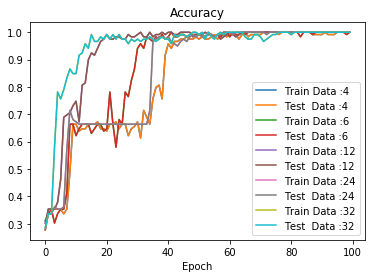

In [0]:
import matplotlib.pyplot as plt
legends = []
for i in range(5):
  plt.plot(history_callback_train[i].history["acc"])
  legends.append('Train Data :' + str(unit_size[i]))
  plt.plot(history_callback_train[i].history["acc"])
  legends.append('Test  Data :' + str(unit_size[i]))
#plt.plot(history_callback.history["acc"])
#plt.plot(history_callback.history["loss"])
plt.xlabel('Epoch')
#plt.legend(['accuracy', 'loss'])
plt.legend(legends)
plt.title('Accuracy')

In [0]:
# Rastgele bir veri seçilerek çıktı önizlenir.
tahmin = sc.transform(np.array([5.0,2.0,3.5,1.0]).reshape(1,4))
predict = model.predict(tahmin)
predict_class = model.predict_classes(tahmin)[0]

print("Tahmin        : ", tahmin)
print("Predict       : ", predict)
print("Predict Class : ", predict_class)

# Toplamda 3 sınıf var: Iris-setosa,Iris-versicolor,Iris-virginica

Tahmin        :  [[-1.09182799 -2.43911656 -0.19573747 -0.3239902 ]]
Predict       :  [[1.0856192e-04 9.9999988e-01 9.9999976e-01]]
Predict Class :  1
